In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

In [18]:
#	Load the dataset

df = pd.read_csv('communities.data', delim_whitespace=True)

# including variable names to the dataset

variable_names = [
    'state', 'county', 'community', 'communityname', 'fold', 'population','householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp','agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban',
    'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc','pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc','whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap',
    'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade','PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu','PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce','MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
    'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids','PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent','PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig','PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly','PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup','PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous',
    'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR','HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded','PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb',
    'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian','RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc','MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn',
    'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85','LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop','LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
    'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp','PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz','PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars','PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy','LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop'
]

df.columns = variable_names

df.to_csv('communities_cleaned.csv', index=False)

# Defined target (predictive goal)

target = "ViolentCrimesPerPop"

# Display sample
#print(df.head(5))


In [19]:
# Data Preprocessing - finding numeric and non-numeric columns

numeric_cols = df.select_dtypes(include=['number']).columns

print("Numeric columns:", list(numeric_cols))

non_numeric_cols = df.select_dtypes(exclude=['number']).columns

print("Non Numeric columns:", list(non_numeric_cols))

non_numeric_cols = df.select_dtypes(exclude=['number']).columns



Numeric columns: ['state', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHo

In [20]:
## **finding predictive and non-predictive columns**
    
# non-predictive attributes such as state, county, community, communityname

non_predictive_cols = ["state", "county", "community", "communityname", "fold", target]

predictive_cols = [c for c in df.columns if c not in non_predictive_cols]

print("Predictive columns:", predictive_cols[:10], "...")  # show first 10

print("Non-predictive columns:", non_predictive_cols)

# Predictive columns (features)
predictive_cols = [c for c in df.columns if c not in non_predictive_cols]

predictive_df = df[predictive_cols]

# Split predictive columns by data type into numeric and categorical

predictive_numeric = predictive_df.select_dtypes(include=["number"]).columns.tolist()

predictive_categorical = predictive_df.select_dtypes(exclude=["number"]).columns.tolist()

print(f"🔹 Total columns: {len(df.columns)}")
print(f"🔹 Predictive columns: {len(predictive_cols)}")
print(f"   • Numeric: {len(predictive_numeric)}")
print(f"   • Categorical: {len(predictive_categorical)}")
print(f"🔹 Non-predictive columns: {len(non_predictive_cols)}")

Predictive columns: ['population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up'] ...
Non-predictive columns: ['state', 'county', 'community', 'communityname', 'fold', 'ViolentCrimesPerPop']
🔹 Total columns: 128
🔹 Predictive columns: 122
   • Numeric: 99
   • Categorical: 23
🔹 Non-predictive columns: 6


In [21]:
## **Data Preprocessing -- drop non-numeric columns only from the predictive features**

# Filter only those columns for numeric data
numeric_df = predictive_df.select_dtypes(include=[np.number])

# 3️⃣ Drop rows with missing target values
numeric_df = numeric_df.join(df[target])   # Add target back
numeric_df = numeric_df.dropna(subset=[target])


In [22]:
## **data preparation phase**

# Handle missing values

predictive_df = predictive_df.apply(pd.to_numeric, errors="coerce")

predictive_df = predictive_df.fillna(predictive_df.mean())

## Encode categorical columns (if any)

categorical_cols = predictive_df.select_dtypes(exclude=[np.number]).columns

predictive_df = pd.get_dummies(predictive_df, columns=categorical_cols, drop_first=True)

## Combine with target variable

df_model = predictive_df.join(df[target])

df_model = df_model.dropna(subset=[target])



🔍 Top positive correlations:
 ViolentCrimesPerPop    1.000000
PctIlleg               0.737965
racepctblack           0.631279
pctWPubAsst            0.574690
FemalePctDiv           0.556472
TotalPctDiv            0.553164
MalePctDivorce         0.525699
PctPopUnderPov         0.521872
PctUnemployed          0.504227
PctHousNoPhone         0.488237
Name: ViolentCrimesPerPop, dtype: float64

🔍 Top negative correlations:
 medIncome          -0.424220
medFamInc          -0.439105
PctHousOwnOcc      -0.470701
PctPersOwnOccup    -0.525500
pctWInvInc         -0.576329
PctTeen2Par        -0.661598
PctYoungKids2Par   -0.666094
racePctWhite       -0.684787
PctFam2Par         -0.706713
PctKids2Par        -0.738445
Name: ViolentCrimesPerPop, dtype: float64

✅ Selected features (|corr| > 0.3): ['PctIlleg', 'racepctblack', 'pctWPubAsst', 'FemalePctDiv', 'TotalPctDiv', 'MalePctDivorce', 'PctPopUnderPov', 'PctUnemployed', 'PctHousNoPhone', 'PctNotHSGrad']


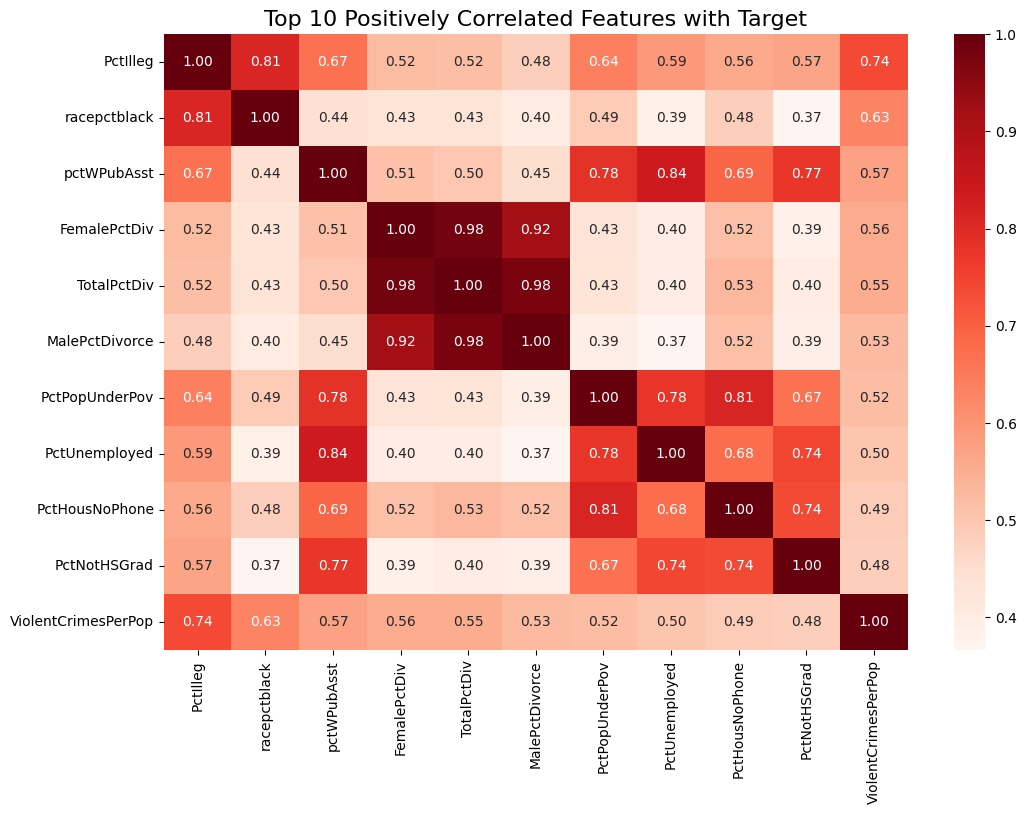

In [23]:
## Identify Key Predictive Factors using correleation

if target not in numeric_df.columns:
    numeric_corr_df = numeric_df.join(df[[target]])
else:
    numeric_corr_df = numeric_df.copy()

# Compute correlation
corr = numeric_corr_df.corr(numeric_only=True)[target].sort_values(ascending=False)

print("🔍 Top positive correlations:\n", corr.head(10))
print("\n🔍 Top negative correlations:\n", corr.tail(10))

# Select features with correlation above threshold
threshold = 0.3

selected_features = corr[abs(corr) > threshold].drop(target)

selected_features_train = corr[corr.abs() > threshold].index.tolist()

# Select top 10 positively correlated features
top_positive_features = selected_features.sort_values(ascending=False).head(10).index.tolist()

print("\n✅ Selected features (|corr| > 0.3):", top_positive_features)

# Prepare correlation matrix for heatmap
corr_matrix = df[top_positive_features + [target]].corr()

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Reds", cbar=True)
plt.title("Top 10 Positively Correlated Features with Target", fontsize=16)
plt.show()





Correlation between PctIlleg and ViolentCrimesPerPop: 0.738
Correlation between racepctblack and ViolentCrimesPerPop: 0.631
Correlation between pctWPubAsst and ViolentCrimesPerPop: 0.575
Correlation between FemalePctDiv and ViolentCrimesPerPop: 0.556
Correlation between TotalPctDiv and ViolentCrimesPerPop: 0.553


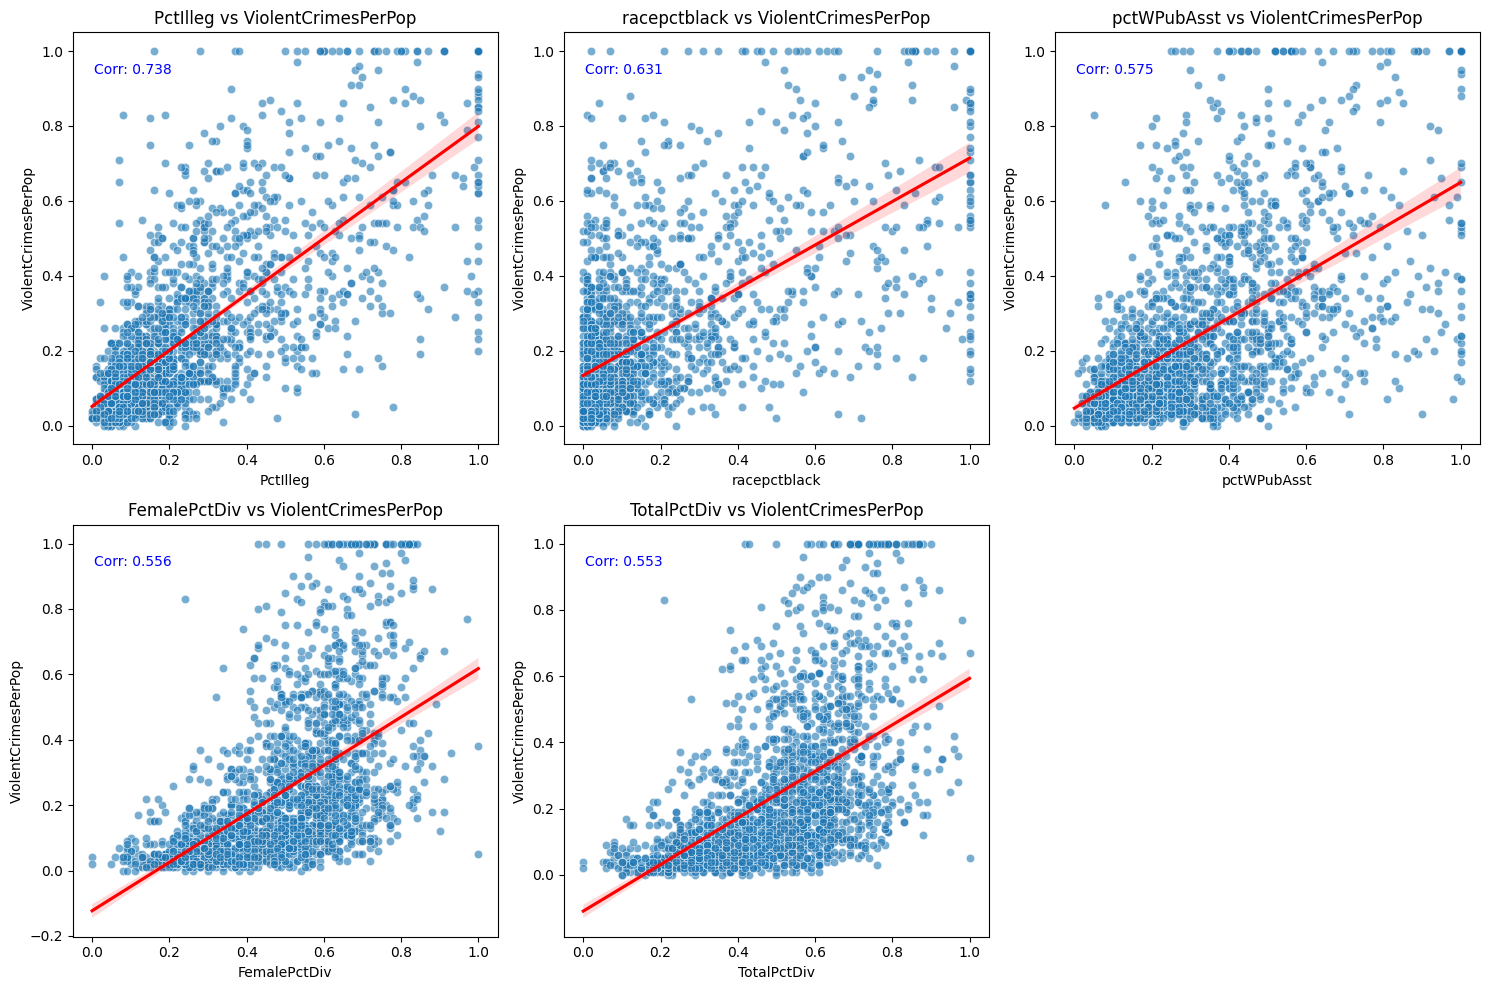

In [24]:
# Top 5 positively correlated features
top5_positive = selected_features.sort_values(ascending=False).head(5).index.tolist()

# Plot scatter plots with regression lines
plt.figure(figsize=(15, 10))

for i, feature in enumerate(top5_positive, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=feature, y=target, data=df, alpha=0.6)
    sns.regplot(x=feature, y=target, data=df, scatter=False, color='red')
    plt.title(f"{feature} vs {target}")
    plt.xlabel(feature)
    plt.ylabel(target)
    
    # Compute correlation coefficient
    corr_coef = df[feature].corr(df[target])
    # Annotate on plot
    plt.annotate(f"Corr: {corr_coef:.3f}", xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10, color='blue')
    # Also print in console
    print(f"Correlation between {feature} and {target}: {corr_coef:.3f}")

plt.tight_layout()
plt.show()


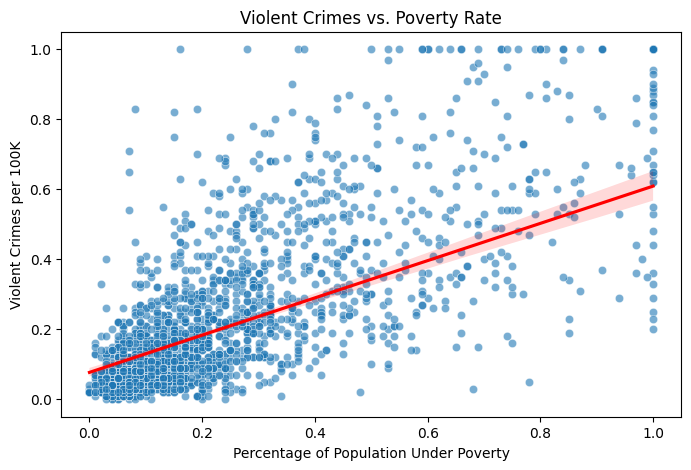

Correlation between poverty and violent crime: 0.522


In [25]:
#Visualize the Relationship - violent crime rates increase with poverty

plt.figure(figsize=(8, 5))
sns.scatterplot(x='PctIlleg', y='ViolentCrimesPerPop', data=df, alpha=0.6)
sns.regplot(x='PctPopUnderPov', y='ViolentCrimesPerPop', data=df, scatter=False, color='red')
plt.title("Violent Crimes vs. Poverty Rate")
plt.xlabel("Percentage of Population Under Poverty")
plt.ylabel("Violent Crimes per 100K")
plt.show()

#Check the Correlation Coefficient
correlation = df['PctPopUnderPov'].corr(df['ViolentCrimesPerPop'])
print(f"Correlation between poverty and violent crime: {correlation:.3f}")


In [26]:

## **Split data for training and testing**

from sklearn.model_selection import train_test_split

X = df_model[selected_features_train]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
##Train a model to identify key factors uisng Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))



c:\Users\i00719\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\i00719\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\i00719\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


R² Score: 0.9999600609068787


c:\Users\i00719\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\i00719\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\i00719\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


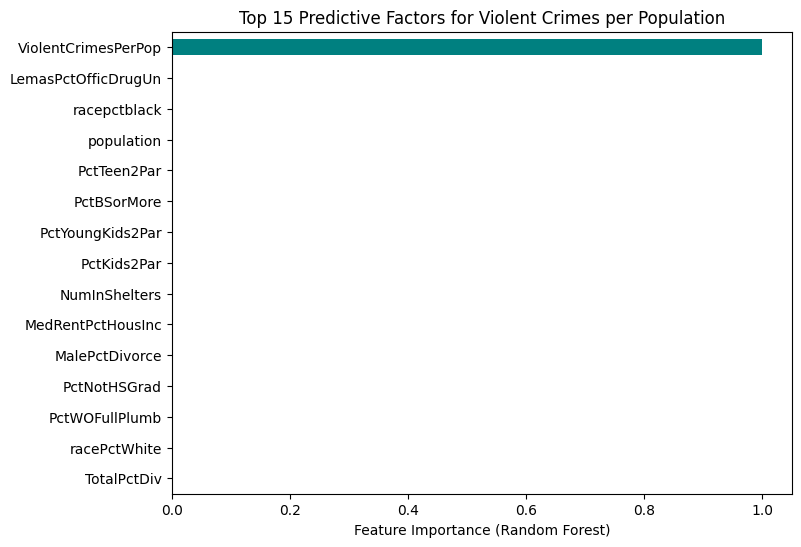

ViolentCrimesPerPop    0.999918
LemasPctOfficDrugUn    0.000003
racepctblack           0.000003
population             0.000003
PctTeen2Par            0.000003
PctBSorMore            0.000003
PctYoungKids2Par       0.000003
PctKids2Par            0.000003
NumInShelters          0.000003
MedRentPctHousInc      0.000002
MalePctDivorce         0.000002
PctNotHSGrad           0.000002
PctWOFullPlumb         0.000002
racePctWhite           0.000002
TotalPctDiv            0.000002
dtype: float64


In [28]:
##Identify Key Predictive Factors given by random forest

import matplotlib.pyplot as plt

importances = pd.Series(model.feature_importances_, index=X_train.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(8,6))
top_features.plot(kind='barh', color='teal')
plt.title("Top 15 Predictive Factors for Violent Crimes per Population")
plt.xlabel("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

print(top_features)

In [ ]:
## Prepare data for Singular Value Decomposition (SVD) for feature reduction

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import numpy as np

# With non-numeric columns -- X find standarize features

# Standardize features (mean=0, std=1) – for SVD
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape of dataset for SVD:", X_scaled.shape)


Shape of dataset for SVD: (1993, 45)


c:\Users\i00719\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\i00719\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\i00719\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\i00719\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarn

Explained variance ratio by component:
Component 1: 0.430
Component 2: 0.135
Component 3: 0.075
Component 4: 0.060
Component 5: 0.047
Component 6: 0.043
Component 7: 0.029
Component 8: 0.020
Component 9: 0.019
Component 10: 0.017


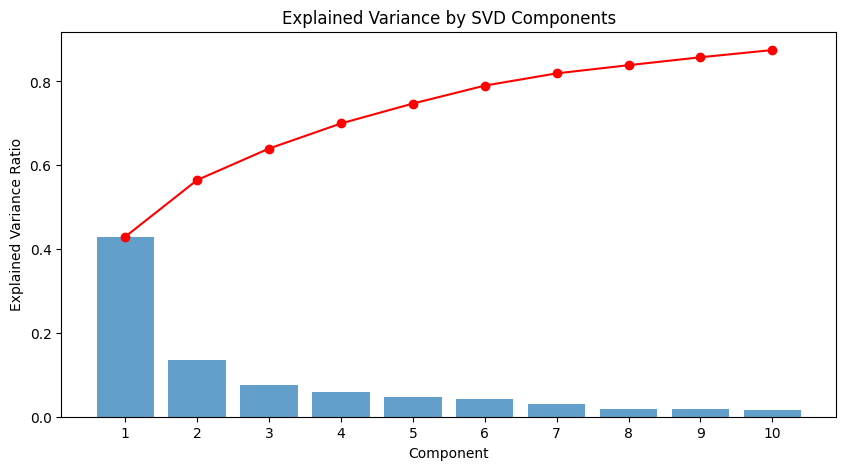

In [30]:
## Apply SVD 

# Choose number of components (k). top 10 components
n_components = 10
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_svd = svd.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = svd.explained_variance_ratio_
print("Explained variance ratio by component:")

for i, var in enumerate(explained_variance, 1):
    print(f"Component {i}: {var:.3f}")


plt.figure(figsize=(10, 5))
plt.bar(range(1, n_components + 1), explained_variance, alpha=0.7)
plt.plot(range(1, n_components + 1), np.cumsum(explained_variance), marker='o', color='red')
plt.title("Explained Variance by SVD Components")
plt.xlabel("Component")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1, n_components + 1))
plt.show()

In [ ]:
##	Analyse the components obtained and interpret their significance in relation to target prediction.
# SVD helps to find which feature contributes more to each compoenents
# High values shows more contribution

components = pd.DataFrame(svd.components_, columns=X.columns)
components.index = [f"Component_{i+1}" for i in range(n_components)]

# Show top contributing features per component
for i in range(n_components):
    print(f"\nTop features in Component {i+1}:")
    print(components.iloc[i].abs().sort_values(ascending=False).head(10))



Top features in Component 1:
PctKids2Par         0.212719
PctFam2Par          0.208254
PctYoungKids2Par    0.201879
pctWInvInc          0.192961
pctWPubAsst         0.190901
PctPopUnderPov      0.189544
PctTeen2Par         0.187639
PctIlleg            0.186192
medFamInc           0.184917
medIncome           0.183121
Name: Component_1, dtype: float64

Top features in Component 2:
numbUrban              0.347846
population             0.341437
NumUnderPov            0.308728
NumInShelters          0.306485
HousVacant             0.306103
NumIlleg               0.305660
NumStreet              0.257861
LemasPctOfficDrugUn    0.179737
PctBSorMore            0.176815
PctOccupMgmtProf       0.168640
Name: Component_2, dtype: float64

Top features in Component 3:
PctLargHouseFam        0.412841
PctNotSpeakEnglWell    0.410331
PctPersDenseHous       0.372063
MalePctDivorce         0.281182
TotalPctDiv            0.255943
FemalePctDiv           0.220921
PctLess9thGrade        0.215787
PctWOFul


Correlation of components with target:
Component_1     0.740519
Component_2     0.207896
Component_5     0.182188
Component_7     0.154718
Component_3    -0.000307
Component_8    -0.042967
Component_10   -0.052294
Component_9    -0.052302
Component_4    -0.107966
Component_6    -0.191762
Name: ViolentCrimesPerPop, dtype: float64


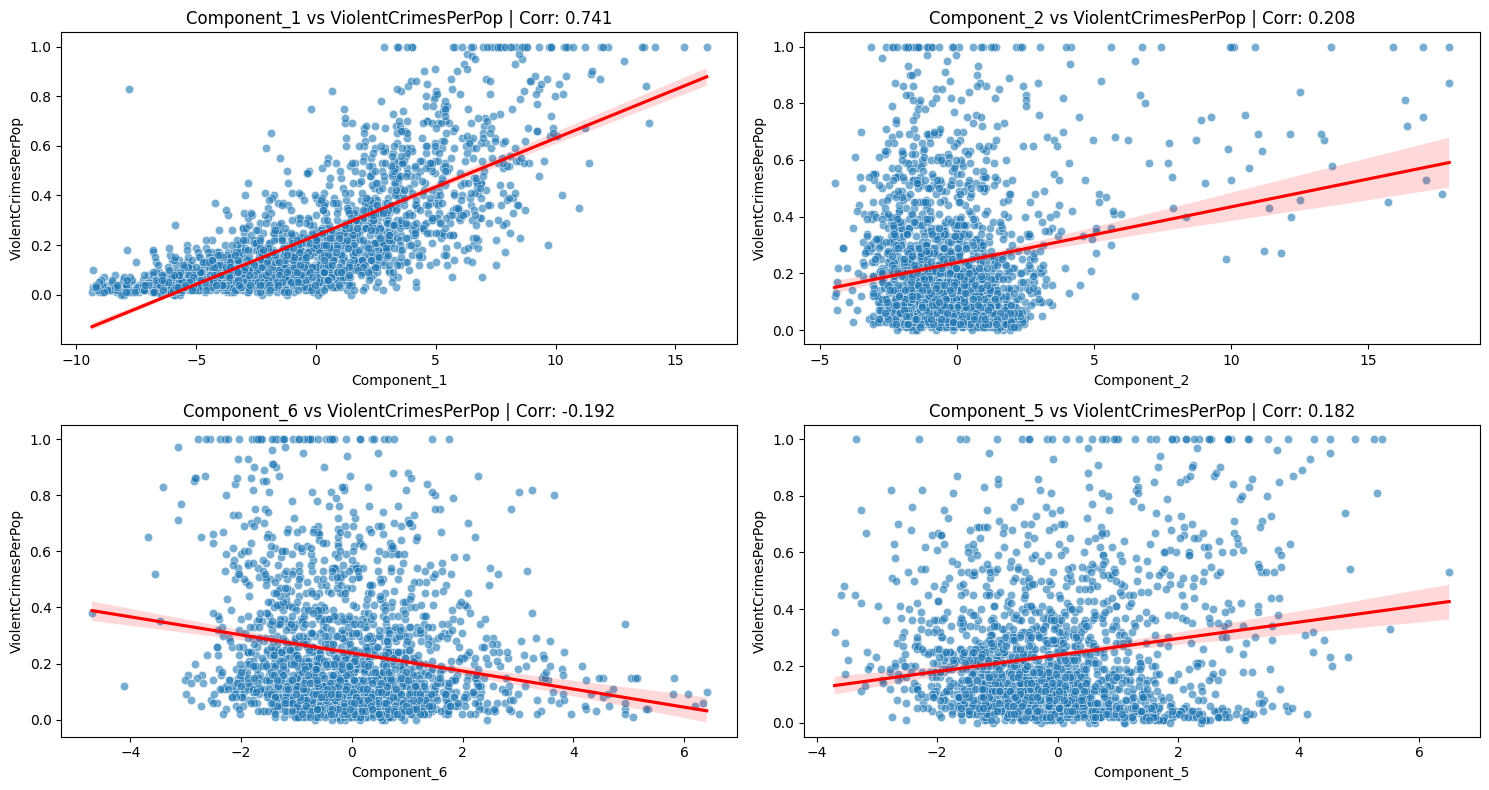

In [32]:
# correlate each SVD component with target to find which is more predictive

svd_df = pd.DataFrame(X_svd, columns=[f"Component_{i+1}" for i in range(n_components)])
svd_df[target] = numeric_df[target].values

# Correlation with target
component_corr = svd_df.corr()[target].drop(target)
print("\nCorrelation of components with target:")
print(component_corr.sort_values(ascending=False))

# -----------------------------
# 5️⃣ Scatter plots of top components vs target
# -----------------------------
top_components = component_corr.abs().sort_values(ascending=False).head(4).index.tolist()

plt.figure(figsize=(15, 8))
for i, comp in enumerate(top_components, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=comp, y=target, data=svd_df, alpha=0.6)
    sns.regplot(x=comp, y=target, data=svd_df, scatter=False, color='red')
    plt.title(f"{comp} vs {target} | Corr: {component_corr[comp]:.3f}")
    plt.xlabel(comp)
    plt.ylabel(target)
plt.tight_layout()
plt.show()